# <font color="hotpink"> Statistics with Python</font>

## <font color="#fe7401"> Permutation and Combination </font>

* Permutation means arrange ie. order matters.
* Combinations means select ie. order doesn't matter.
<img src="background/permu_comb.png" width="300">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
import warnings
import statistics
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

# help(itertools)
# help(statistics)

In [2]:
arr = np.array([ch for ch in "HORSE"])
print(len(list(itertools.combinations(arr, 2))))
print(len(list(itertools.permutations(arr, 2))))

10
20


In [3]:
print(list(itertools.permutations([1,2,3], 2)))
print(list(itertools.combinations([1,2,3], 2)))

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
[(1, 2), (1, 3), (2, 3)]


In [4]:
def nCr(n, r):
    return math.factorial(n) / (math.factorial(r)*math.factorial(n-r))

# how many ways can 10 balls be picked from 7 red out of 10, and 3 blue out of 8
print(nCr(10, 7) * nCr(8, 3))

6720.0


## <font color="#fe7401">Descriptive Statistics</font>
* Measures of Dispersion provide insights on the spread of given dataset.
* Major measures of dispersion are: range, percentile, inter-quartile range, standard deviation, variance, skewness, and kurtosis.
* **Range** is the difference between maximum and minimum values of the dataset.
* **Percentile** refers to a value, below which lies given the percentage of data points.
* E.g., 45th percentile refers to a value below which 45% of data points are found.
* `percentile` function of numpy can be used to compute a single or multiple percentiles.
* Three **Quartiles** namely, Q1 Q2 and Q3, split the entire dataset into four equal parts. Each part contains 25% of data.
* **Inter quartile range** refers to difference between third quartile (Q3) and first quartile (Q1).
* `iqr` method from scipy.stats can be used for calculating it.
* **Variance** is defined as the average of squared differences, of each data point from dataset's mean.
* **Standard Deviation** is square root of variance.
* `var` and `std` functions of numpy can be used for computing variance and standard deviation respectively.
* By default, the functions assume that the dataset represents entire population. To represent a sample, derived from a population, `ddof` parameter is set to 1.
* **skewness** determines whether the majority of data points are present on one side of the distribution.
* A positive value represents right skewed distribution; a negative value represents left skewed one, zero represent unskewed distribution.
* **Positively skewed** (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.
* **Kurtosis** indicates how much of data is concentrated around mean or shape of the probability distribution.
* It can be estimated using `kurtosis` function of scipy.stats module.
* By default, it uses Fisher’s definition. This can be changed to Pearson by setting fisher parameter to False.

In [5]:
arr = [1,2,4,4]
print("Mean:", statistics.mean(arr))
print("Median:", statistics.median(arr))
print("Mode:", statistics.mode(arr))
print("Population stddev:", statistics.pstdev(arr))
print("Population variance:", statistics.pvariance(arr))

Mean: 2.75
Median: 3.0
Mode: 4
Population stddev: 1.299038105676658
Population variance: 1.6875


In [6]:
arr = np.array([2,3,4,5,5,5])
print(np.mean(arr))
print(np.median(arr)) # (4+5)/2 -> 4.5
print(stats.mode(arr))

4.0
4.5
ModeResult(mode=array([5]), count=array([3]))


In [7]:
s1 = np.array([86, 47, 45, 47, 40])
print(np.ptp(s1))  # range or peak to peak

46


In [8]:
s2 = np.array([86, 47, 45, 47, 40, 97, 98, 75, 65, 83])
print(np.percentile(s2, 45, interpolation="lower"))
s2.sort()
s2

65


array([40, 45, 47, 47, 65, 75, 83, 86, 97, 98])

In [9]:
# interpolation keyword is going to be deprecated in numpy
np.percentile(s2, [25,50,75], method="lower")   # Q1, Q2 and Q3 quartiles

array([47, 65, 83])

In [10]:
stats.iqr(s2, rng=[25,75], interpolation="lower")    # Q3 - Q1 -> 83 - 47 -> 36

36

In [11]:
print(np.var(s2))   # for population
print(np.std(s2))
print(np.var(s2, ddof=1))   # for sample ie. N - 1
print(np.std(s2, ddof=1))

454.21000000000004
21.312203077110542
504.6777777777778
22.46503455990615


1.7661328409045185


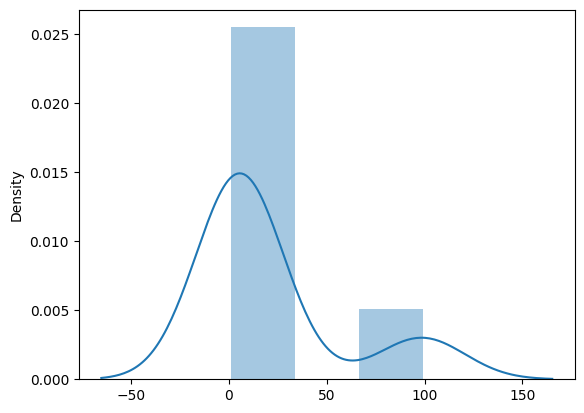

In [12]:
s3 = [1,2,3,4,5,6,7,8,9,10,99,98]
print(stats.skew(s3))    # positive skew, most values around left tail

sns.distplot(s3, bins=3)   # distribution plot, depicts the variation in the data distribution.
plt.show()

In [13]:
print(s3)
print("Mean:", np.mean(s3))
print("Kurtosis:", stats.kurtosis(s3))  # an example of positive kurtosis, most of the data around the mean

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99, 98]
Mean: 21.0
Kurtosis: 1.1599354083897495


### Kurtosis
![Kurtosis](./background/kurtosis.webp)

## <font color="#fe7401"> Random Numbers, Variables and Distributions </font>
* A random number is a number, chosen by chance from a distribution.
* Python provides a lot of modules, which deal with random numbers.
    1. random module of python standard library.
    2. random module of Numpy
    3. stats module of Scipy


### <font color="blue"> numpy's random module </font>
* `random` module of `numpy` has utilities, which generate arrays of random numbers.
* E.g.: rand function generates uniformly distributed numbers from range [0, 1]
* rand function with no arguments generate a single random value.
* By passing arguments, it generates a random array of specified size.

In [14]:
print(np.random.rand())
print(np.random.rand(2,3))
print(np.random.randint(1,10))

0.5160629912059577
[[0.08436813 0.64816336 0.46767813]
 [0.50761331 0.62441817 0.74315   ]]
5


In [15]:
# two items are selected randomly, without replacement.
print(np.random.choice([11, 22, 33], 2, replace=False))

[11 22]


#### <font color="grey">random.seed()</font>
* **seed** is a number that sets the initial state of random number generator.
* setting a seed, helps in generating the same sequence of random numbers, repeatedly.
* seed method of a random module can be used to set a seed as shown in below example.

In [16]:
np.random.seed(100)
print(np.random.rand())

0.5434049417909654


In [17]:
# we got same value even after applying random bcs of seed
np.random.seed(100)
print(np.random.rand())

0.5434049417909654


### <font color="blue"> Random Distributions </font>
* `scipy.stats` module provide a lot of methods for created discrete and continuous random variables.<br>
* Commonly used methods are described below.
    * **pdf / pmf** : Probability distribution function (continuous) or probability mass function (discrete).
    * **cdf** : Cumulative distribution function.
    * **sf** : Survival function (1 – cdf).
    * **rvs** : Creating random samples from a distribution.

In [18]:
# defines a normal continuous random variable of mean (bell curve's peak) 1.0 and std dev. (flatness) 2.5.
x = stats.norm(loc=5, scale=2.5)

# It also estimates probabilities and cumulative probabilities at -1, 0 and 1.
print(x.pdf([-1, 0, 1]))
print(x.cdf([-1, 0, 1]))

# generates six random numbers from defined normal distribution.
print(x.rvs((2,3)))

[0.00895781 0.02159639 0.04436833]
[0.00819754 0.02275013 0.05479929]
[[3.59590311 0.87730624 5.88668613]
 [3.03483917 4.42031951 5.5199392 ]]


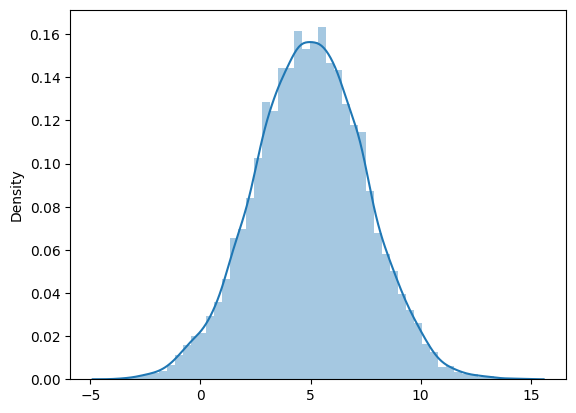

In [19]:
# check loc/mean and scale/std dev
sns.distplot(x.rvs(10000,10000), bins=50)
plt.show()

## <font color="#fe7401">Hypothesis Testing</font>
* Hypothesis Testing is a methodology for evaluating if a claim is acceptable or not, based on data.
* In a Hypothesis Testing, a **Null Hypothesis (Ho)** represents currently accepted the state of knowledge, and an **Alternative Hypothesis (Ha)** represents a new claim which challenges the currently accepted state of knowledge.
* The null hypothesis and the alternative hypothesis are mutually exclusive.
* Steps Involved in Hypothesis Testing
    1. Define the null hypothesis and the alternative hypothesis.
    2. Select a test statistics whose probability distribution function can be found under the null hypothesis.
    3. Collect data.
    4. Compute the test statistics from the data and calculate its p-value under the null hypothesis.
    5. Null hypothesis is rejected if the p-value is lower than predetermined significance value.
* The methods used for performing t-test are shown below.
    * `stats.ttest_1samp`: Tests if the mean of a population is a given value.
    * `stats.ttest_ind`: Tests if the means of two independent samples are equal.
    * `stats.ttest_rel`: Tests if the means of two paired samples are equal.

In [20]:
# Example 1
'''
Consider a normal population with mean 0.8 and standard deviation 0.5.
Define the null hypothesis as Mean of the population is 1.0.
Let's calculate t-statistic and p-value
'''
mu, sigma = 0.8, 0.5
X = stats.norm(mu, sigma)

# Deriving a sample
n = 100
X_sample = X.rvs(n)

# Computing test statistic
t, p = stats.ttest_1samp(X_sample, 1.0)
print(t, p)

# Since p-value is very low and less than the significance level 0.05, 
# we can reject the null hypothesis and infer that the mean of the population is not 1.

-4.6096766186175335 1.2053870608536614e-05


In [21]:
# Example 2
'''
Let's consider another problem, where the null hypothesis states that the population means of two random variables are equal.
The below example derives two samples from different populations and verifies the claim that their population means are equal.
'''
X1 = stats.norm(0.25, 1.0)
X2 = stats.norm(0.50, 1.0)

X1_sample = X1.rvs(100)
X2_sample = X2.rvs(100)

t, p = stats.ttest_ind(X1_sample, X2_sample)
print(t, p)

# Since p-value is very low and less than the significance level 0.05, 
# we can reject the null hypothesis and state that population means of both samples differ.

-1.734695496476908 0.08435093505384637


## <font color="#fe7401"> Statistical Modelling </font>
* A Statistical Model is a mathematical equation, which explains the relationship between dependent variables (Y) and independent variables (X).
* In general, a model is written as `Y = f(X)`
* However, in reality, an element of uncertainty is expected due to factors such as measurement noise. Hence the aforementioned equation can be rewritten as `Y = f(X) + e` where 'e' is residual error
* The simplest model is a *linear model* represented as `Y = B0 + B1*X + e`, where the coefficients, B0 and B1 are the parameters of the model and e is normally distributed residual error.
* A linear regression model assumes that residuals are independent and normally distributed.
* The model is fitted to data using ordinary least squares approach.
* Once a model is chosen, **design matrices** y and X are constructed, and the regression problem is written, in matrix form, as `y = XB + e`, where y is the vector of dependent variables, X is the vector of independent variables, B is a vector of coefficients, and e is the residual (error).

In [22]:
# The below example shows calculation of design matrices, y, and X, 
# for the considered linear model Y = B0 + B1*X1 + B2*X2 + B3*X1*X2.

y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T  # here T is for transpose

print(y)
print(X)

[1 2 3 4 5]
[[  1.   6.  11.  66.]
 [  1.   7.  12.  84.]
 [  1.   8.  13. 104.]
 [  1.   9.  14. 126.]
 [  1.  10.  15. 150.]]


In [23]:
# vstack stacks arrays vertically and returns np.ndarray

a = np.array([5,6])
b = np.ones(2)
c = np.vstack([a, b])

print(c)
print("Transpose:\n", c.T)

[[5. 6.]
 [1. 1.]]
Transpose:
 [[5. 1.]
 [6. 1.]]


### <font color="blue"> Design Matrices with patsy </font>

* `patsy`, a python library, allows defining a model in simpler easily.
* It also constructs relevant design matrices, automatically, using `patsy.dmatrices` function.
* patsy.dmatrices takes a formula (in string form) as a *first argument*, and a dictionary-like object with data arrays for the response variables as *second arguments*.
* Let's understand few patsy formulae provided below.
    * `y ~ x` : y is linearly dependent on x. ~ symbol separates dependent variable from independent variable terms. It is also equivalent to `y ~ 1 + x`.
    * `y ~ x1 + x2` : y is a linear combination of x1 and x2. + sign is used to denote the union of terms.
    * `y ~ x1*x2` : `x1*x2` is an interaction term that includes all lower order terms. Hence formula is equivalent to `y ~ 1 + x1 + x2 + x1*x2`.
    * `y ~ np.log(x1)`: Often numpy functions can be used to transform terms in the expression.
    * `y ~ I(x1 + x2)`: `I` is the identify function, used to escape arithmetic expressions and are evaluated.
    * `y ~ C(x1)`: Treats the variable x1 as a categorical variable.

In [24]:
import patsy

y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
data = {'y':y, 'x1':x1, 'x2':x2}

y, X = patsy.dmatrices('y ~ 1 + x1 + x2 + x1*x2', data)

print(y)
print(X)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[  1.   6.  11.  66.]
 [  1.   7.  12.  84.]
 [  1.   8.  13. 104.]
 [  1.   9.  14. 126.]
 [  1.  10.  15. 150.]]


### <font color="blue"> Example Datasets </font>
* `statsmodels` contain few popular example datasets, which can be used to explore various utilities of the package.
* The example data sets are available in `datasets` module.
* Each dataset is associated with special variables like SOURCE, DESCSHORT, DESCLONG, that provide more info about the dataset.
* A dataset can be loaded using `load` function, and its data can be accessed using `dat`a attribute in the form of Numpy's recarray.
* The data can be accessed in from of pandas data frame, if it is loaded with function `load_pandas`.

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

bc_cancer_set = sm.datasets.cancer
bc_cancer = bc_cancer_set.load()
bc_cancer_data = bc_cancer.data

print(type(bc_cancer_data))
bc_cancer_data.head(2)

<class 'pandas.core.frame.DataFrame'>


,cancer,population
0,1.0,445.0
1,0.0,559.0


### <font color="blue"> Linear Regression with statsmodels </font>
* Let's understand how to fit a linear regression model for Icecream dataset available from R Data Repository.
* The icecream_data dataset is a pandas data frame. It contains four variables: cons (consumption), income, price, and temp (temperature).

In [26]:
icecream = sm.datasets.get_rdataset("Icecream", "Ecdat")
icecream_data = icecream.data

print(icecream_data.columns)

Index(['cons', 'income', 'price', 'temp'], dtype='object')


In [27]:
# Initially, let's model consumption with price and temperature, as a linear model.
# The patsy formula for assumed model is: cons ~ price + temp

# Creating a Model with Ordinary Least Square Regression (ols)
linear_model1 = smf.ols('cons ~ price + temp', icecream_data)

# Fitting the Model
linear_result1 = linear_model1.fit()

# Viewing Model Summary
print(linear_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     23.27
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.34e-06
Time:                        17:43:49   Log-Likelihood:                 54.607
No. Observations:                  30   AIC:                            -103.2
Df Residuals:                      27   BIC:                            -99.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5966      0.258      2.309      0.0

* The R-squared value of 0.633 suggests that model is not a proper fit.
* The probability value of coefficient price is high, i.e., 0.141. This accepts the null-hypothesis: the value of price coefficient is equal to zero.
* Hence, the variable price does not affect cons variable.

In [28]:
# Now let's create a new model by considered income and temp dependent variables.
linear_model2 = smf.ols('cons ~ income + temp', icecream_data)
linear_result2 = linear_model2.fit()

print(linear_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     31.81
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           7.96e-08
Time:                        17:43:49   Log-Likelihood:                 57.742
No. Observations:                  30   AIC:                            -109.5
Df Residuals:                      27   BIC:                            -105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1132      0.108     -1.045      0.3

* R-squared value improved to 0.702, suggesting this is a better model than previous one.
* Probability values of income and temp are low, indicating they are highly significant to cons.
* The probability value of Intercept is too high.

In [29]:
# Now let's create a new model without considering intercept term.
linear_model3 = smf.ols('cons ~ -1 + income + temp', icecream_data)
linear_result3 = linear_model3.fit()

print(linear_result3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cons   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1426.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):                    6.77e-29
Time:                        17:43:49   Log-Likelihood:                          57.146
No. Observations:                  30   AIC:                                     -110.3
Df Residuals:                      28   BIC:                                     -107.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* R-squared value increased to 0.990, which suggests the model could best describe the relationship of cons with income and temp variables.

### <font color="blue"> Logistic Regression with statsmodels </font>
* Logistic regression is a classification algorithm.
* `statsmodels` provide the following classes to work with discrete regression problems.
    * `Logit`: for Logistic Regression
    * `MNLogit`: for Multinomial Logistic Regression
    * `Poisson`: for Poisson Regression
* Now, let's understand how to perform logistic regression using statsmodels with the following steps:
    1. Download the popular iris data set (containing data of 3 species) from R repository.
    2. Subset the data of only two species.
    3. Perform transformations, if required.
    4. Define a patsy formula and create a model using logit.
    5. Fit the model with supplied data.
    6. View summary of the model.

In [30]:
df = sm.datasets.get_rdataset("iris").data 

# df.info()
df.Species.unique() 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
# Selecting Required Data

df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica")].copy()
print(df_subset.Species.unique())

['versicolor' 'virginica']


In [32]:
# A binary variable corresponding to two species is created using map function as shown below.
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0}) 

# period characters, present in column names are replaced with underscore characters.
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",	"Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True) 

In [33]:
# A logistic regression model, explaining relationship of 
# Species variable with Petal_Length and Petal_width is generated using logit function.
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

# Model is then fit with supplied data using fit function
result = model.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Dec 2022   Pseudo R-squ.:                  0.8517
Time:                        17:43:52   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.782      0.005     -17.808      -3.086
================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
# Predicting Response Variable
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)
df_new["P-Species"].head(3)

df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)
df_new.head()

,Petal_Length,Petal_Width,P-Species,Species
0,4.783843,1.478423,0.908788,1
1,5.998742,1.246526,0.093664,0
2,4.556203,1.391860,0.989155,1
3,5.284247,1.969027,0.003315,0
4,5.444185,2.009266,0.000870,0


In [35]:
# Poisson Regression example

ins_df = sm.datasets.get_rdataset('Insurance', package='MASS',).data 
data = {'holders':ins_df['Holders'],'claims':ins_df['Claims']}

poisson_model = smf.poisson('claims ~ np.log(holders)', data)
poisson_model_result = poisson_model.fit()

float(poisson_model_result.resid.sum())

Optimization terminated successfully.
         Current function value: 3.468160
         Iterations 7


6.679101716144942e-13

### <font color="blue"> ANOVA with statsmodels </font>
* *anova_lm* method from `anova` module of `statsmodels` library can be used for performing ANOVA.

In [36]:
# Loading the Dataset
icecream = sm.datasets.get_rdataset("Icecream", "Ecdat")
icecream_data = icecream.data

In [37]:
# Building the Model
model1 = smf.ols('cons ~ temp', icecream_data).fit()

In [38]:
# Now let's frame a null hypothesis: Value of B1, i.e., the coefficient of temp variable is zero.

from statsmodels.stats import anova

print(anova.anova_lm(model1))

# The obtained F-statistic is 42.27 and has a very low probability.
# Hence, the null hypothesis can be rejected. i.e., B1 is not equal to zero.

            df    sum_sq   mean_sq         F        PR(>F)
temp       1.0  0.075514  0.075514  42.27997  4.789215e-07
Residual  28.0  0.050009  0.001786       NaN           NaN


#### <font color="grey"> Determining F-Value </font>
* F-statistic is defined as Mean square of model / Mean square of residuals.
* Mean square of model is sum of squares values of all variables / degrees of freedom

## <font color="#fe7401"> MCQ's </font>
1. An alternative hypothesis states there is no effect. State true or false. False
2. While performing anova on a regression model fitted with multiple variables, the alternative hypothesis is framed as: Coefficients of all independent variables not equal to zero. State if it is true or false? False
3. Which of the following function, available in statsmodels, is used to fit a Poisson regression model? poisson
4. Which of the following expressions correctly calculate the variance of a sample, x, derived from a population? np.var(x, ddof=1)
5. The greater the value of the F ratio ? the less the sample distributions overlap
6. The patsy formula `y ~ x1*x2` is equivalent to which of the following expressions? `y ~ x1 + x2 + x1*x2`
7. In a linear regression, the coefficients of the model are estimated by minimizing the sum of the squares of ? residuals
8. Which of the following definition is used by default in kurtosis method of scipy.stats module? fisher
9. Which of the following method of scipy.stats module is used to determine inter quartile range a distribution? iqr
10. R-square value close to zero indicates a good fit. State if it is true or false? False
11. Which of the following function is used to test goodness of fit of a continuous distribution to data? stats.kstest
12. Which of the following function is used to treat a numeric variable as a categorical one? C 
13. What is the cumulative probability of finding F-statistic lower than 1, for a F distribution with degrees of freedom 2 and 27? 0.619
14. Given, slope of a linear regression line is 1.5, and when x is 10 y takes the value of 8. Determine the intercept of the regression line. -7 (y = mx + c)
15. What is the cumulative probability of finding F-statistic higher than 1, for a F distribution with degrees of freedom 2 and 27? 0.381
16. While performing anova on a regression model fitted with a single variable, the null hypothesis is framed as: Coefficient of independent variable is zero. State if it is true or false? True
17. Which of the following method is used to generate random numbers for a defined distribution available in scipy.stats module? rvs
18. Whether a student will pass or fail in the competitive exam based on hours of study can be solved using? Logistic Regression
19. What is the output of ?
```
from scipy import stats
print(stats.mode([8, 9, 8, 7, 9, 6, 7, 6]))
```
Ans: ```ModeResult(mode=array([6]), count=array([2]))```